In [14]:
import pandas as pd
import numpy as np

In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df_data = pd.read_csv(data_url, sep='\s+', header = None)
# \s+ 는 공백이 여러칸, 현재 dataset에는 

df_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# pandas to matrix
df_data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## 데이터 모판 만들기

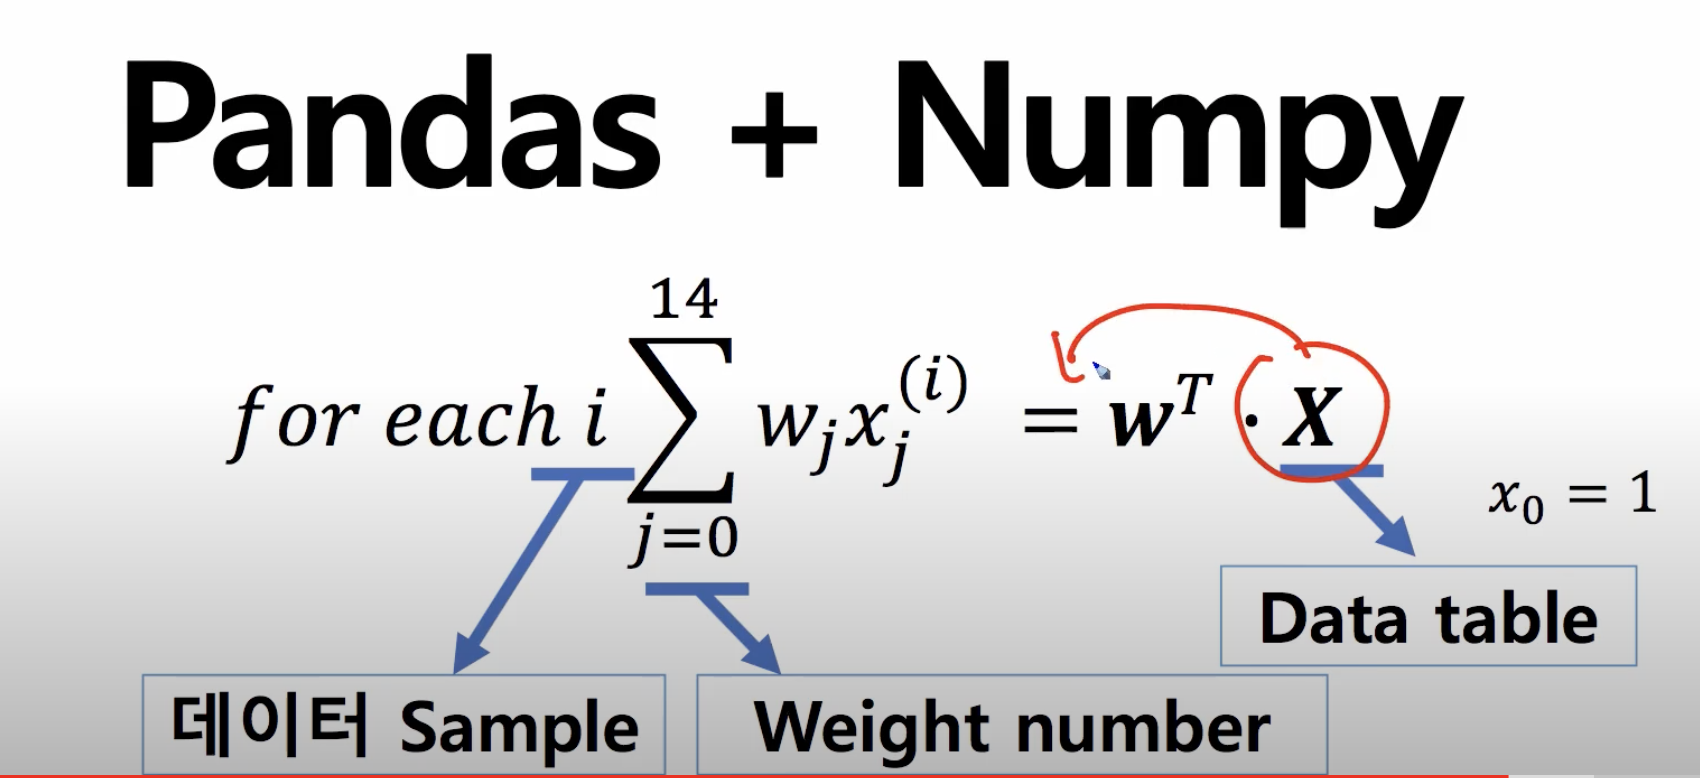

In [11]:
# weight 0 맨 앞에 값 추가
df_data.insert(0,'weight_0', 1)
df_data.head()

,weight_0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
df_data = df_data.drop('MEDV', axis = 1) # 열방향 제거 (y 제거)
df_data.head()

,weight_0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [15]:
df_matrix = df_data.values # x
weight_vector = np.random.random_sample((14,1))

In [16]:
weight_vector # 가중치 (원래는 학습해서 얻는 값)

array([[0.15965163],
       [0.44642143],
       [0.45071132],
       [0.49412724],
       [0.37199846],
       [0.37354755],
       [0.85157063],
       [0.49225802],
       [0.26439899],
       [0.41963628],
       [0.40527177],
       [0.05446223],
       [0.26734242],
       [0.84126498]])

In [17]:
df_matrix.dot(weight_vector)

array([[279.90443046],
       [263.1427437 ],
       [249.64419427],
       [231.75227714],
       [238.64799387],
       [239.39091538],
       [294.47480922],
       [315.26174922],
       [323.10865234],
       [305.82985874],
       [314.61356181],
       [303.73943717],
       [282.15312015],
       [281.69389347],
       [290.10184559],
       [278.76517171],
       [261.71759492],
       [294.15379696],
       [242.74212637],
       [286.04717121],
       [304.57677427],
       [298.6283683 ],
       [305.45228585],
       [309.52513367],
       [303.62162402],
       [275.13730724],
       [295.7775983 ],
       [278.53504221],
       [299.62751831],
       [293.57927516],
       [299.73533169],
       [299.41468825],
       [264.225385  ],
       [296.10995512],
       [269.72368966],
       [273.29885503],
       [266.17764784],
       [259.4782023 ],
       [254.2503046 ],
       [267.15526852],
       [262.59847139],
       [216.27386424],
       [217.86035015],
       [222